# Soccer

Dataset: **European Soccer Database**

Source: <https://www.kaggle.com/datasets/hugomathien/soccer/code>

In [31]:
# Soccer Data Analysis: From Acquisition to Basic Modeling
# Author: Xiucai Ding (Edited by Wonjun)
# Date: 2025-07-15

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## 1. Data Loading

In [32]:
country_df = pd.read_csv('../data/raw/Country.csv')
league_df = pd.read_csv('../data/raw/League.csv')
match_df = pd.read_csv('../data/raw/Match.csv')
player_attr_df = pd.read_csv('../data/raw/Player_Attributes.csv')
player_df = pd.read_csv('../data/raw/Player.csv')
sqlite_df = pd.read_csv('../data/raw/sqlite_sequence.csv')
team_attr_df = pd.read_csv('../data/raw/Team_Attributes.csv')
team_df = pd.read_csv('../data/raw/Team.csv')

In [33]:
print("Country dataset:")
print(country_df.shape)
country_df.head()

Country dataset:
(11, 2)


,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [34]:
print("League dataset:")
print(league_df.shape)
league_df.head()

League dataset:
(11, 3)


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [35]:
print("Match dataset:")
print(match_df.shape)
match_df.head()

Match dataset:
(25979, 115)


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [36]:
print("Player Attributes dataset:")
print(player_attr_df.shape)
player_attr_df.head()

Player Attributes dataset:
(183978, 42)


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [37]:
print("Player dataset:")
print(player_df.shape)
player_df.head()

Player dataset:
(11060, 7)


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [38]:
print("Sqlite dataset:")
print(sqlite_df.shape)
sqlite_df.head()

Sqlite dataset:
(7, 2)


,name,seq
0,Team,103916
1,Country,51958
2,League,51958
3,Match,51958
4,Player,11075


In [39]:
print("Team Attributes dataset:")
print(team_attr_df.shape)
team_attr_df.head()

Team Attributes dataset:
(1458, 25)


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [40]:
print("Team dataset:")
print(team_df.shape)
team_df.head()

Team dataset:
(299, 5)


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


## 2. EDA for Match

In [41]:
match_df_clean = match_df.dropna(thresh=match_df.shape[1] * 0.5).copy()

In [42]:
match_df_clean['goal_difference'] = match_df_clean['home_team_goal'] - match_df_clean['away_team_goal']

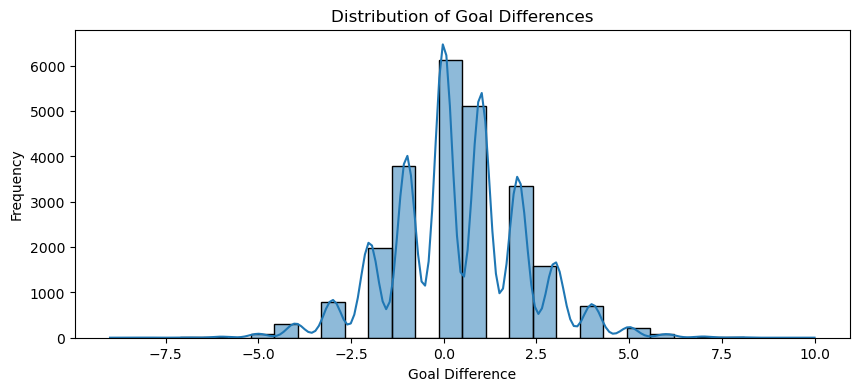

In [43]:
plt.figure(figsize=(10, 4))
sns.histplot(match_df_clean['goal_difference'], bins=30, kde=True)
plt.title("Distribution of Goal Differences")
plt.xlabel("Goal Difference")
plt.ylabel("Frequency")
plt.show()

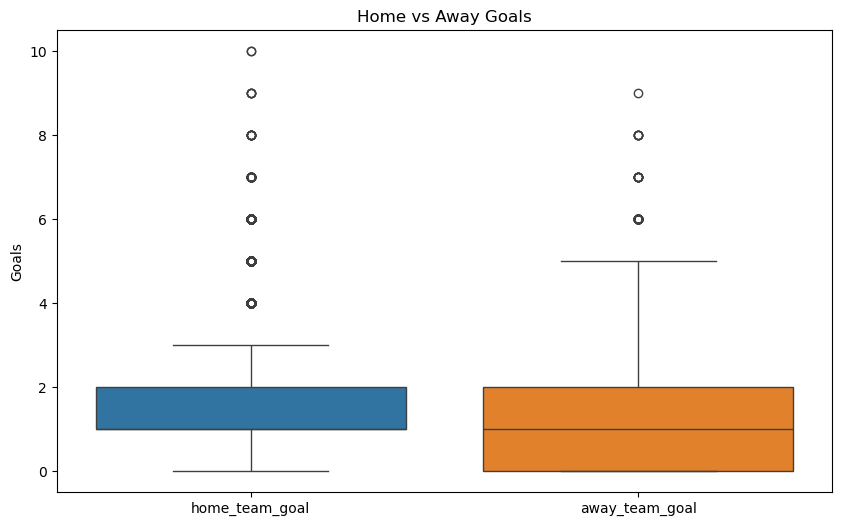

In [44]:
# Additional EDA: Home vs Away Goals
plt.figure(figsize=(10, 6))
sns.boxplot(data=match_df_clean[['home_team_goal', 'away_team_goal']])
plt.title("Home vs Away Goals")
plt.ylabel("Goals")
plt.show()

## 3. Dimensionality Reduction (PCA) and Clustering (KMeans) on Player Attributes

In [45]:
player_attr_df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [46]:
## keep the latest attributes only
player_attr_df['date'] = pd.to_datetime(player_attr_df['date'])
idx = player_attr_df.groupby('player_api_id')['date'].idxmax()

player_attr_df_latest = player_attr_df.loc[idx].reset_index(drop=True)
player_attr_df_latest = player_attr_df_latest.sort_values('id').reset_index(drop=True)
player_attr_df_latest.dropna(inplace=True)

In [47]:
player_attr_df_latest.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,6,189615,155782,2016-04-21,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
2,39,186170,162549,2016-01-07,65.0,67.0,right,medium,medium,64.0,...,68.0,61.0,23.0,22.0,24.0,16.0,11.0,12.0,9.0,13.0
3,65,140161,30572,2016-04-21,69.0,69.0,right,medium,medium,57.0,...,54.0,37.0,72.0,71.0,68.0,15.0,12.0,13.0,12.0,11.0
4,88,17725,23780,2015-12-24,70.0,70.0,right,medium,medium,46.0,...,41.0,45.0,75.0,73.0,71.0,8.0,6.0,16.0,12.0,11.0


In [48]:
## keep numeric variables only (or, you can map string columns to numeric columns!)
string_cols = player_attr_df_latest.select_dtypes(include=['object', 'string']).columns.tolist()
player_stats = player_attr_df_latest.drop(columns=['id', 'player_fifa_api_id', 'player_api_id', 'date'] + string_cols)
player_stats.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,74.0,76.0,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
2,65.0,67.0,64.0,58.0,60.0,66.0,52.0,66.0,67.0,63.0,...,68.0,61.0,23.0,22.0,24.0,16.0,11.0,12.0,9.0,13.0
3,69.0,69.0,57.0,21.0,68.0,65.0,48.0,56.0,38.0,40.0,...,54.0,37.0,72.0,71.0,68.0,15.0,12.0,13.0,12.0,11.0
4,70.0,70.0,46.0,34.0,73.0,65.0,33.0,47.0,42.0,25.0,...,41.0,45.0,75.0,73.0,71.0,8.0,6.0,16.0,12.0,11.0


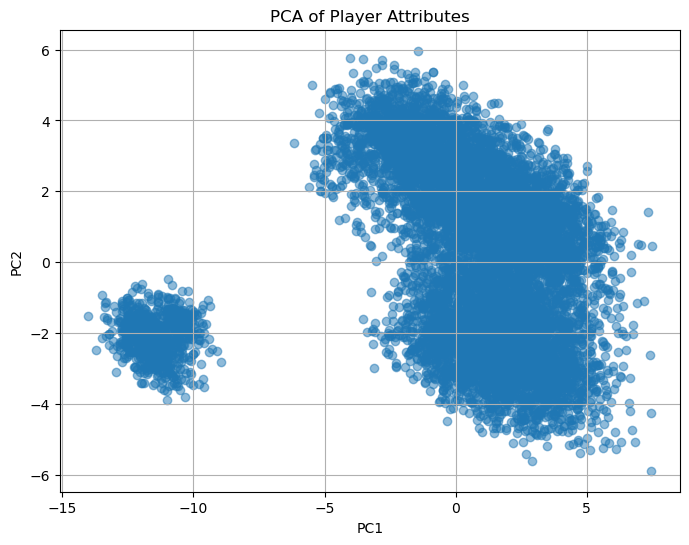

In [49]:
## PCA
scaler = StandardScaler()
scaled_stats = scaler.fit_transform(player_stats.select_dtypes(include=np.number))

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_stats)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title("PCA of Player Attributes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

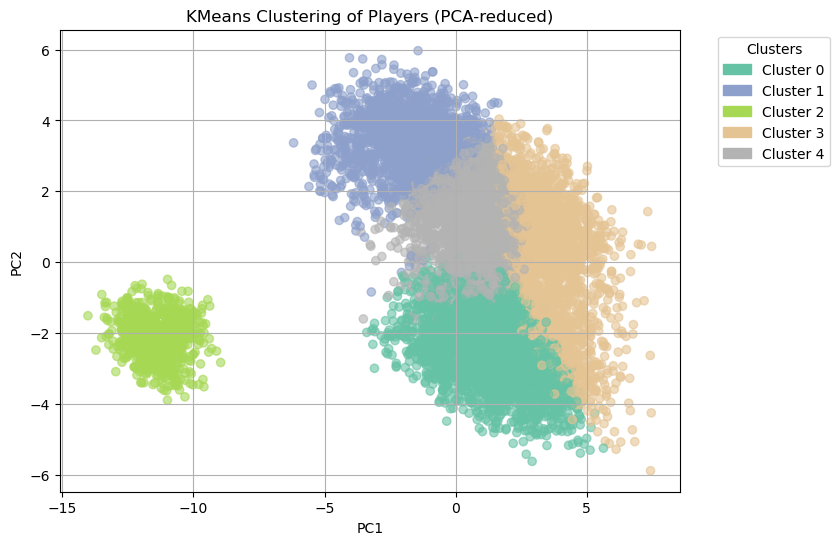

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
cluster,,,,,,,,,,,,,,,,,,,,,
0,67.664865,70.974324,57.907095,65.273649,58.525000,63.610811,61.259122,68.392568,59.783784,53.781081,...,60.960135,63.362500,25.863851,29.511824,26.647973,10.529730,10.582432,10.454730,10.507432,10.414189
1,66.920375,69.611241,42.103044,30.310304,67.491803,57.346604,31.817330,43.508782,36.855972,36.061475,...,42.968970,42.677986,67.060304,69.329040,66.106557,10.442623,10.323185,10.429157,10.528689,10.412178
2,68.080092,70.118993,16.040046,15.569794,16.170481,28.060641,16.267735,16.247140,16.447368,16.262014,...,33.537757,22.824943,15.645309,15.906178,16.042334,69.723112,66.135011,64.091533,67.661327,71.017162
3,74.360509,76.278982,69.340245,59.324694,62.312441,75.099434,60.464185,71.395382,67.873704,63.685674,...,70.154100,63.386899,59.177663,64.986805,61.848728,10.462300,10.489632,10.499529,10.496701,10.444392
4,64.491453,67.711966,59.015385,42.711111,57.032051,64.324786,43.416239,59.658974,52.541880,48.408547,...,55.776923,50.250855,60.048718,63.471795,61.782479,10.472650,10.355556,10.470085,10.397436,10.382051


In [50]:
## KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans_labels = kmeans.fit_predict(scaled_stats)


plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='Set2', alpha=0.6)
plt.title("KMeans Clustering of Players (PCA-reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
handles = [
    mpatches.Patch(color=plt.cm.Set2(i / (kmeans.n_clusters - 1)), label=f'Cluster {i}')
    for i in range(kmeans.n_clusters)
]
plt.legend(handles=handles, title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
player_attr_df_latest['cluster'] = kmeans_labels
plt.grid(True)
plt.show()

# Calculate mean statistics for each cluster
cluster_characteristics = player_attr_df_latest.groupby('cluster')[player_stats.columns].mean()
cluster_characteristics

/var/folders/vd/zd4pmd591n5962tqk3vrhj5c0000gn/T/ipykernel_71852/3677022044.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/vd/zd4pmd591n5962tqk3vrhj5c0000gn/T/ipykernel_71852/3677022044.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/vd/zd4pmd591n5962tqk3vrhj5c0000gn/T/ipykernel_71852/3677022044.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/vd/zd4pmd591n5962tqk3vrhj5c0000gn/T/ipykernel_71852/3677022044.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and w

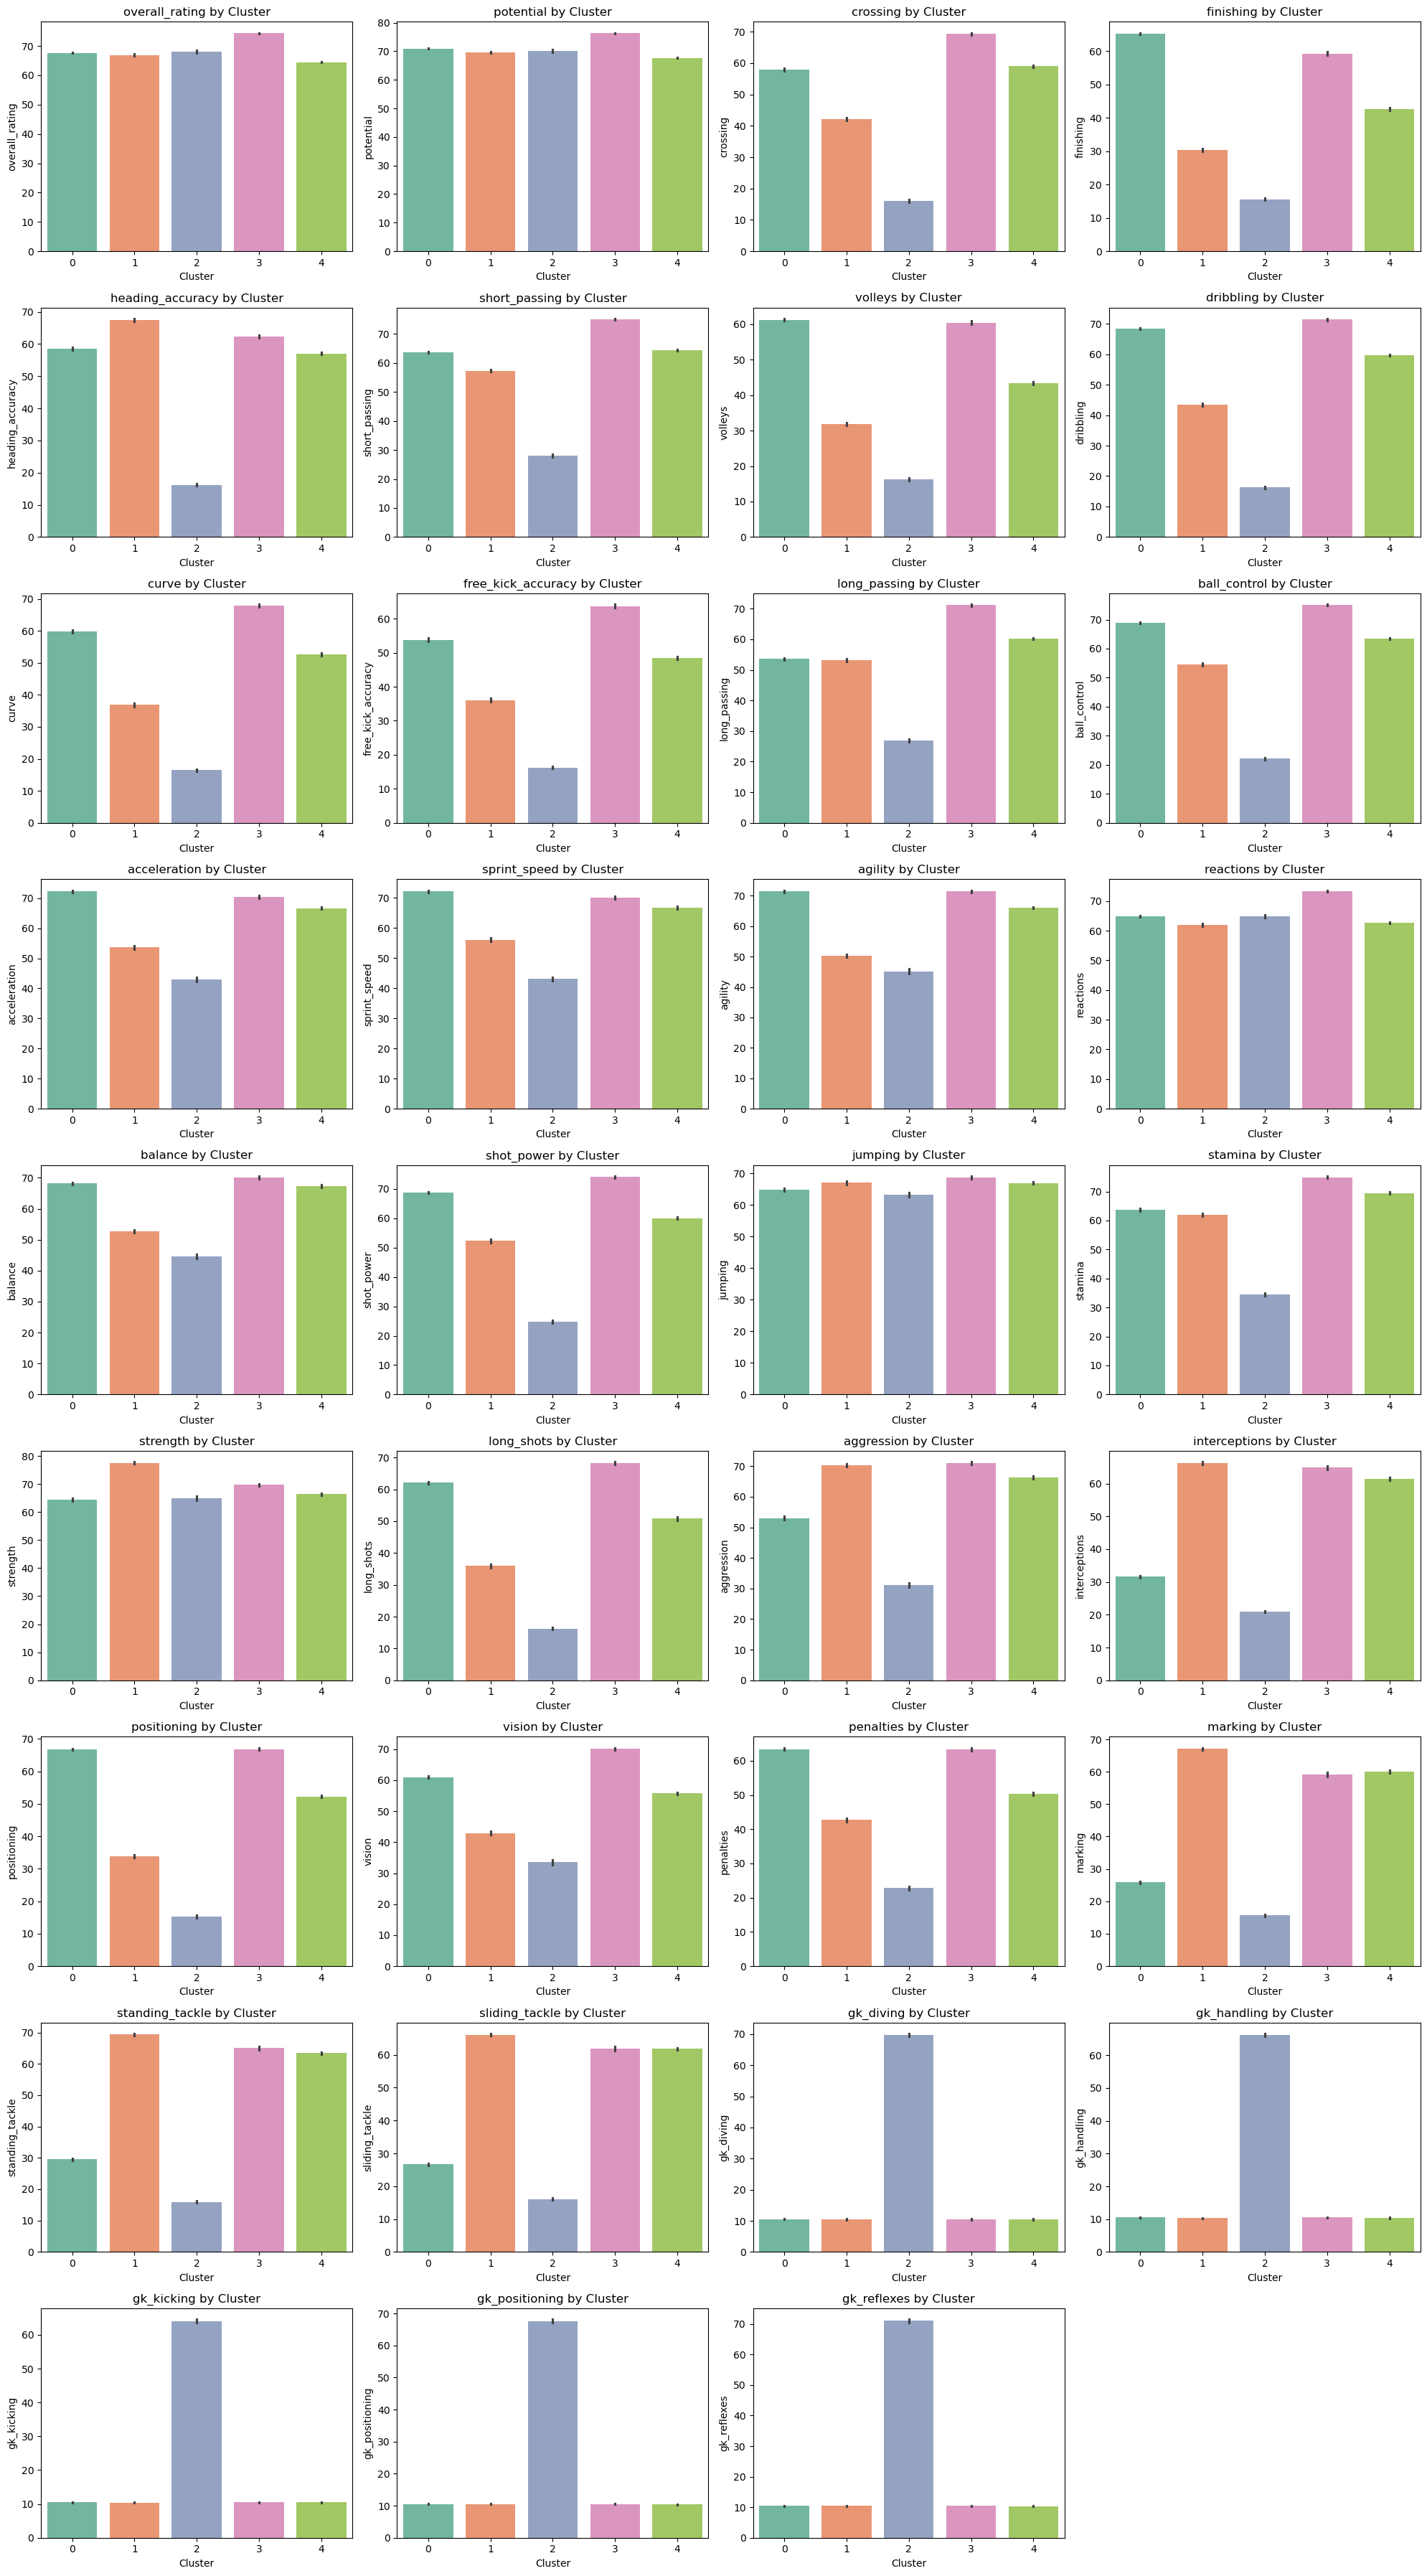

In [ ]:
# Plot bar charts for each statistic by cluster
num_stats = player_stats.columns
n_cols = 4
n_rows = int(np.ceil(len(num_stats) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for i, stat in enumerate(num_stats):
    sns.barplot(
        x='cluster',
        y=stat,
        data=player_attr_df_latest,
        ax=axes[i],
        palette='Set2'
    )
    axes[i].set_title(f"{stat} by Cluster")
    axes[i].set_xlabel("Cluster")
    axes[i].set_ylabel(stat)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Clustering based on the Percentile

In [51]:
# Calculate the overall_rating percentiles
percentile_99 = player_attr_df_latest['overall_rating'].quantile(0.99)
percentile_90 = player_attr_df_latest['overall_rating'].quantile(0.90)

def rating_cluster(rating):
    if rating >= percentile_99:
        return 'Top 1%'
    elif rating >= percentile_90:
        return 'Top 10%'
    else:
        return 'Rest'

player_attr_df_latest['rating_cluster'] = player_attr_df_latest['overall_rating'].apply(rating_cluster)

# Show the distribution


/var/folders/vd/zd4pmd591n5962tqk3vrhj5c0000gn/T/ipykernel_71852/2267475577.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/vd/zd4pmd591n5962tqk3vrhj5c0000gn/T/ipykernel_71852/2267475577.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/vd/zd4pmd591n5962tqk3vrhj5c0000gn/T/ipykernel_71852/2267475577.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/vd/zd4pmd591n5962tqk3vrhj5c0000gn/T/ipykernel_71852/2267475577.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and w

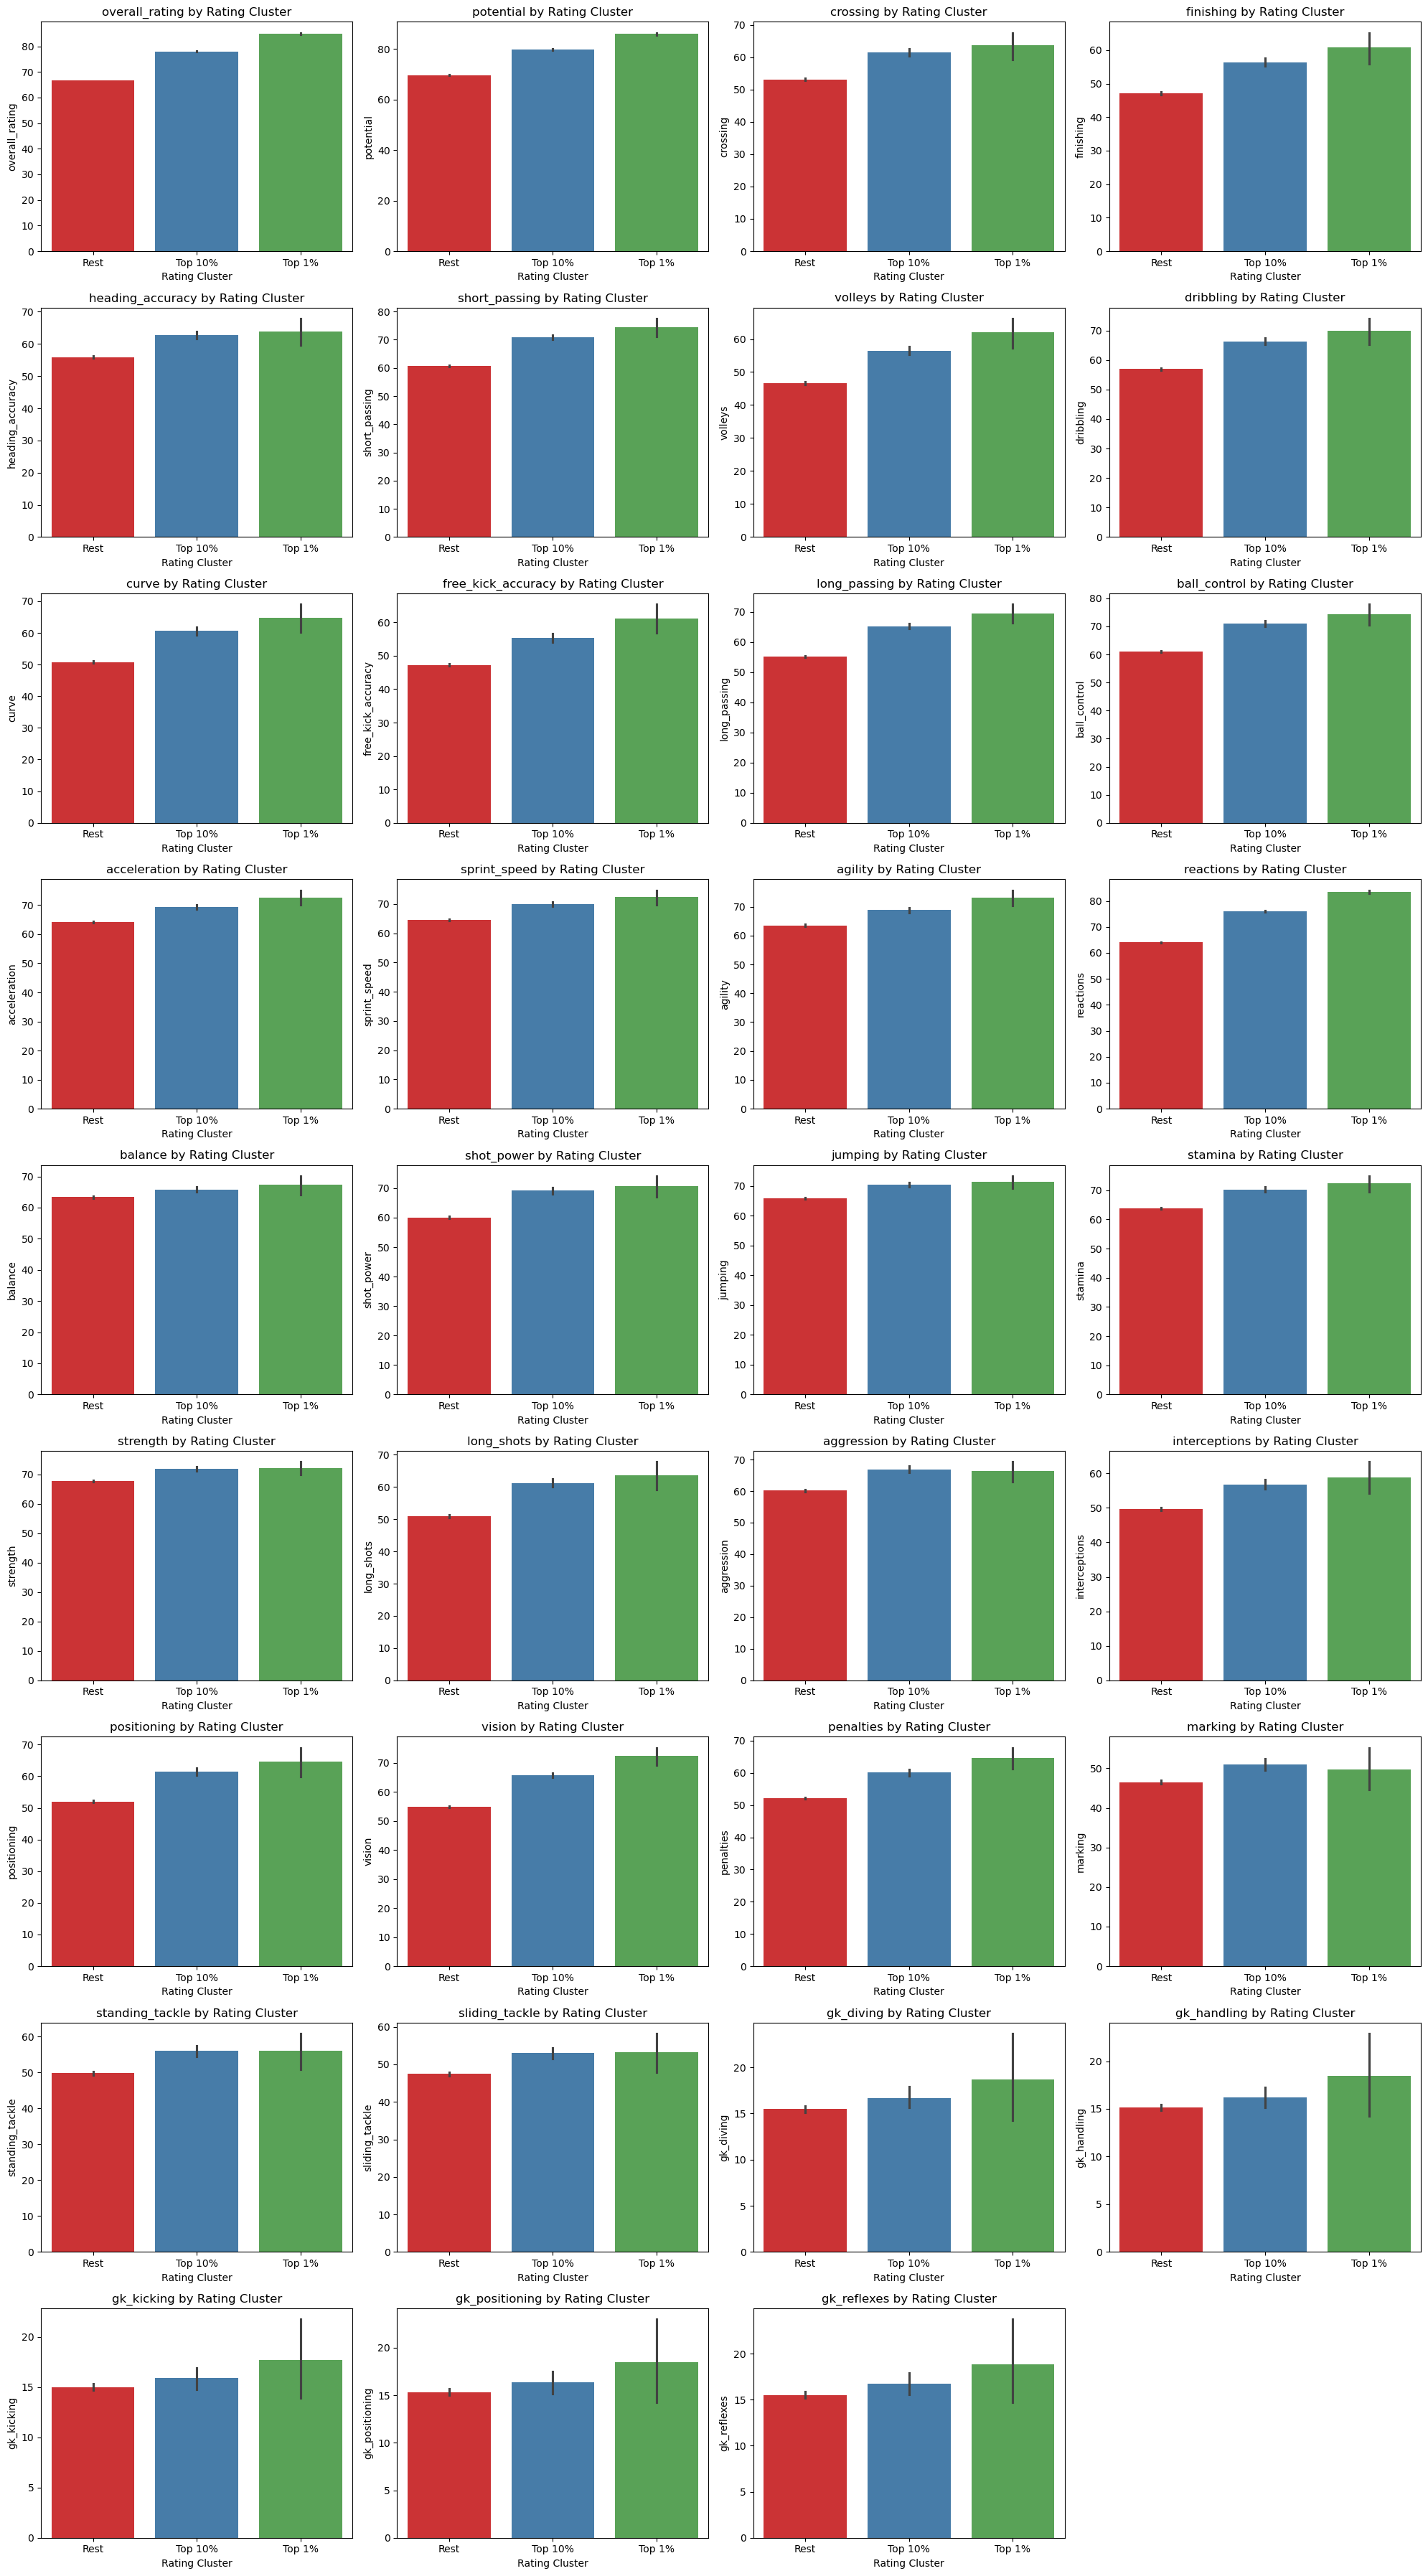

In [61]:
# Plot bar charts for each statistic by rating_cluster
n_cols = 4
n_rows = int(np.ceil(len(num_stats) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for i, stat in enumerate(num_stats):
    sns.barplot(
        x='rating_cluster',
        y=stat,
        data=player_attr_df_latest,
        ax=axes[i],
        palette='Set1'
    )
    axes[i].set_title(f"{stat} by Rating Cluster")
    axes[i].set_xlabel("Rating Cluster")
    axes[i].set_ylabel(stat)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


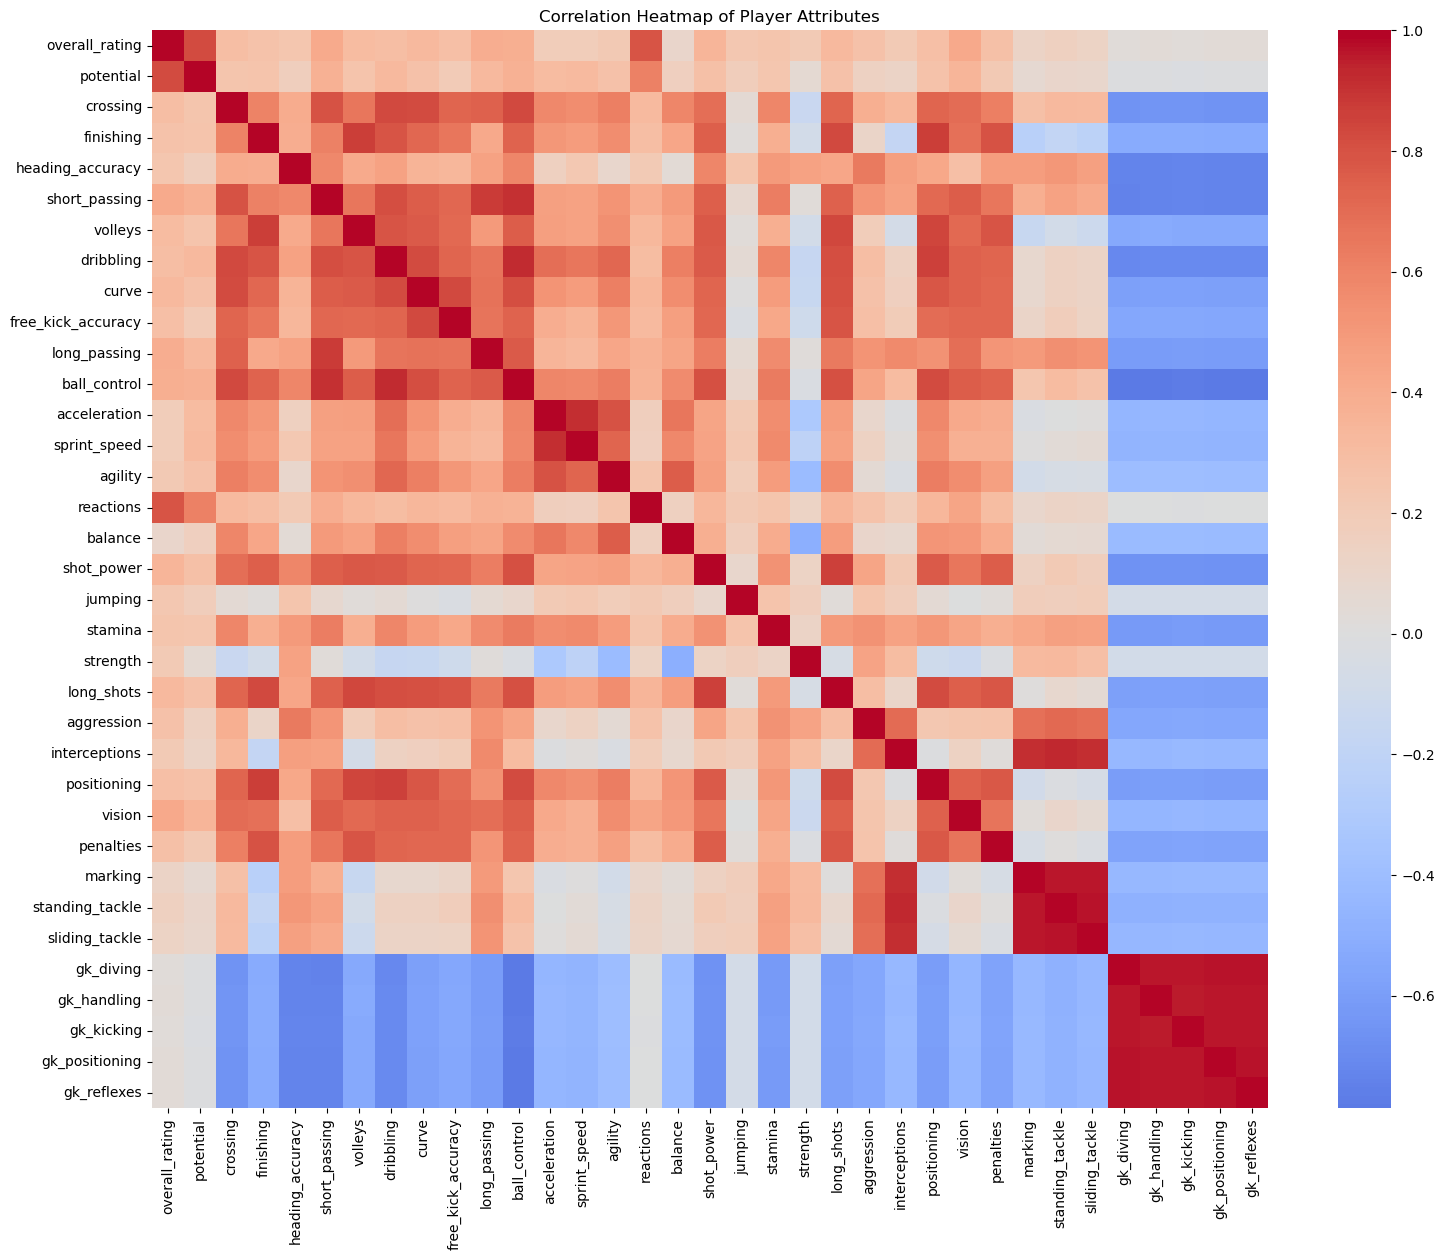

In [62]:
# Create a heatmap of the correlation matrix for player statistics
plt.figure(figsize=(18, 14))
corr = player_stats.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Player Attributes")
plt.show()

# GMM Clustering

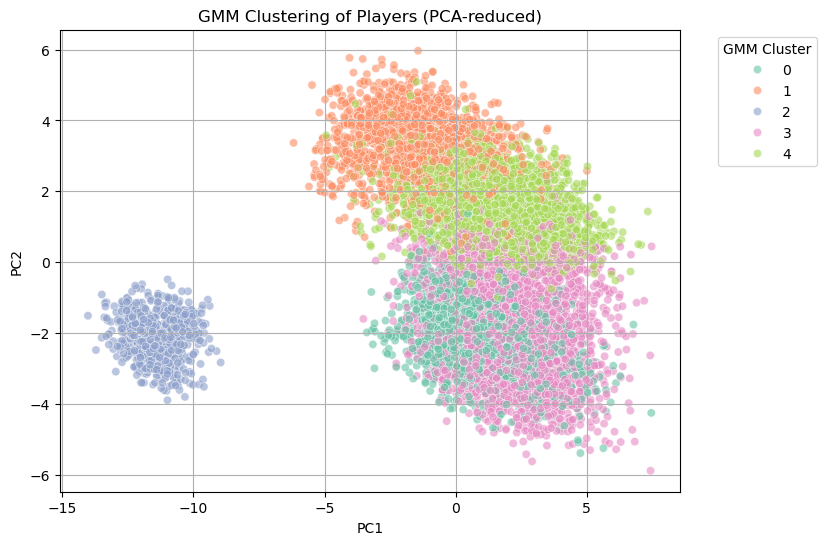

/var/folders/vd/zd4pmd591n5962tqk3vrhj5c0000gn/T/ipykernel_71852/4292915463.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/vd/zd4pmd591n5962tqk3vrhj5c0000gn/T/ipykernel_71852/4292915463.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/vd/zd4pmd591n5962tqk3vrhj5c0000gn/T/ipykernel_71852/4292915463.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/vd/zd4pmd591n5962tqk3vrhj5c0000gn/T/ipykernel_71852/4292915463.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

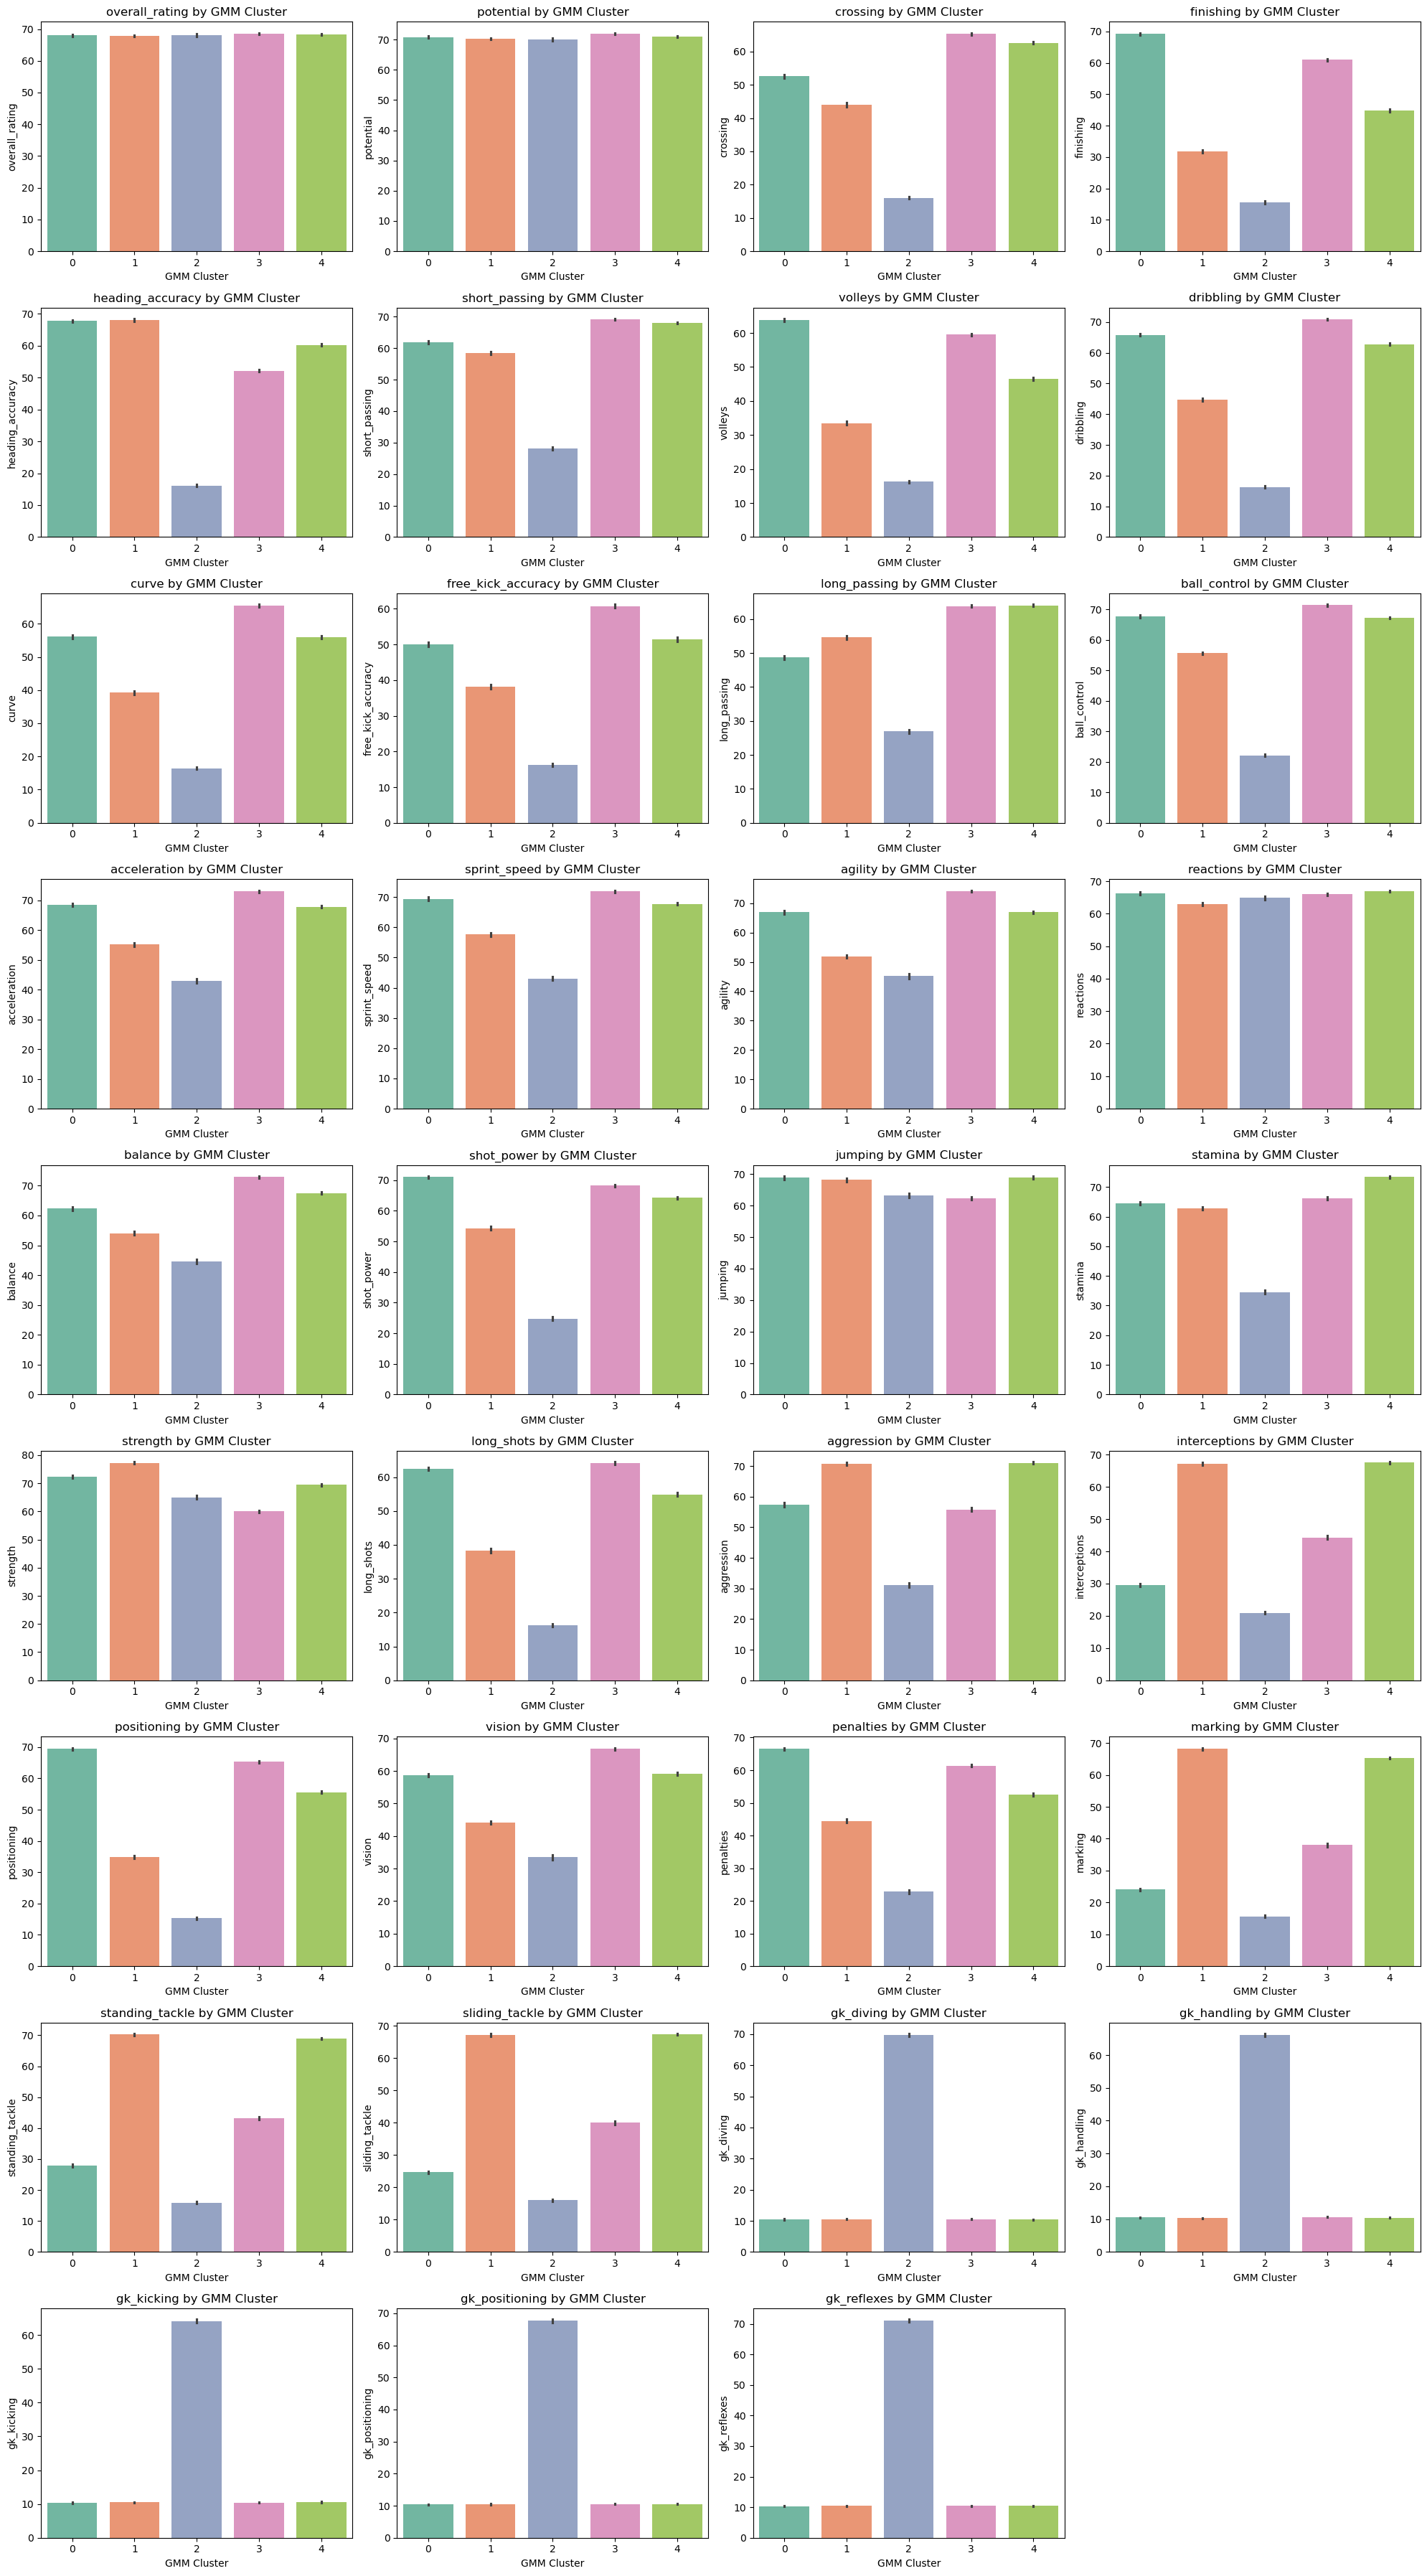

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
gmm_cluster,,,,,,,,,,,,,,,,,,,,,
0,68.071773,70.823884,52.554885,69.267793,67.723160,61.861279,63.803378,65.849216,56.091677,50.038601,...,58.728589,66.509047,24.035585,27.904101,24.636309,10.447527,10.488540,10.360676,10.366104,10.334138
1,67.864880,70.276805,44.031182,31.838074,68.110503,58.379103,33.480853,44.740700,39.198031,38.259847,...,44.180525,44.481400,68.239606,70.229212,67.175602,10.501094,10.269147,10.462801,10.480853,10.455689
2,68.080092,70.118993,16.040046,15.569794,16.170481,28.060641,16.267735,16.247140,16.447368,16.262014,...,33.537757,22.824943,15.645309,15.906178,16.042334,69.723112,66.135011,64.091533,67.661327,71.017162
3,68.615385,72.040259,65.302301,60.959382,52.119339,69.129763,59.491014,70.898275,65.437455,60.784687,...,66.813444,61.396477,38.012581,43.172538,39.975557,10.518692,10.612868,10.441769,10.556075,10.445723
4,68.302935,70.923131,62.633473,44.785465,60.239343,67.964710,46.497904,62.772537,55.969602,51.431167,...,59.122642,52.464011,65.283368,68.988470,67.346611,10.457722,10.398323,10.547170,10.473795,10.398323


In [ ]:
from sklearn.mixture import GaussianMixture

# Fit GMM with 5 clusters (same as KMeans for comparison)
gmm = GaussianMixture(n_components=5, random_state=0)
gmm_labels = gmm.fit_predict(scaled_stats)

# Add GMM cluster labels to the dataframe
player_attr_df_latest['gmm_cluster'] = gmm_labels

# Plot GMM clusters in PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=pca_result[:, 0],
    y=pca_result[:, 1],
    hue=gmm_labels,
    palette='Set2',
    alpha=0.6,
    legend='full'
)
plt.title("GMM Clustering of Players (PCA-reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="GMM Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Show mean statistics for each GMM cluster
gmm_cluster_characteristics = player_attr_df_latest.groupby('gmm_cluster')[num_stats].mean()
gmm_cluster_characteristics

# 

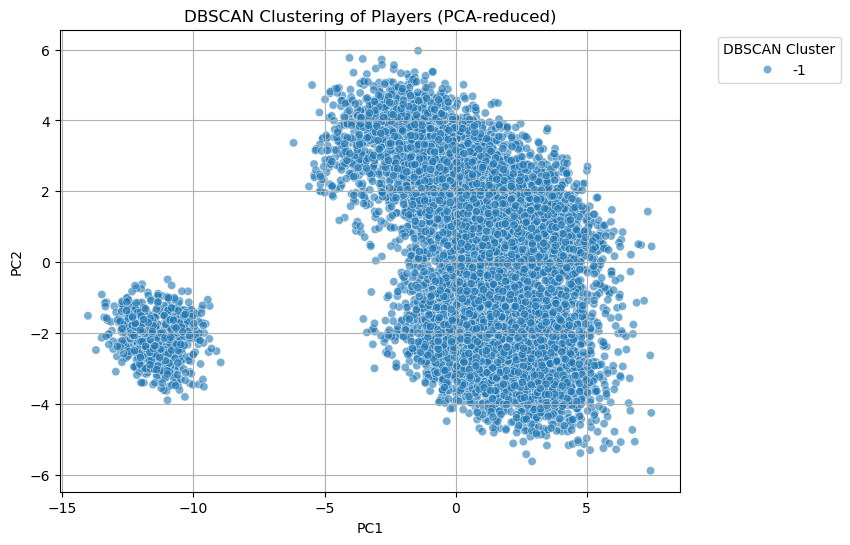

dbscan_cluster
-1    10004
Name: count, dtype: int64

In [ ]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering on the scaled player stats
dbscan = DBSCAN(eps=1.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(scaled_stats)

# Add DBSCAN cluster labels to the dataframe
player_attr_df_latest['dbscan_cluster'] = dbscan_labels

# Plot DBSCAN clusters in PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=pca_result[:, 0],
    y=pca_result[:, 1],
    hue=dbscan_labels,
    palette='tab10',
    alpha=0.6,
    legend='full'
)
plt.title("DBSCAN Clustering of Players (PCA-reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="DBSCAN Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Show the number of players in each DBSCAN cluster
player_attr_df_latest['dbscan_cluster'].value_counts();.

# Agglomerative Heirarchical Clustering

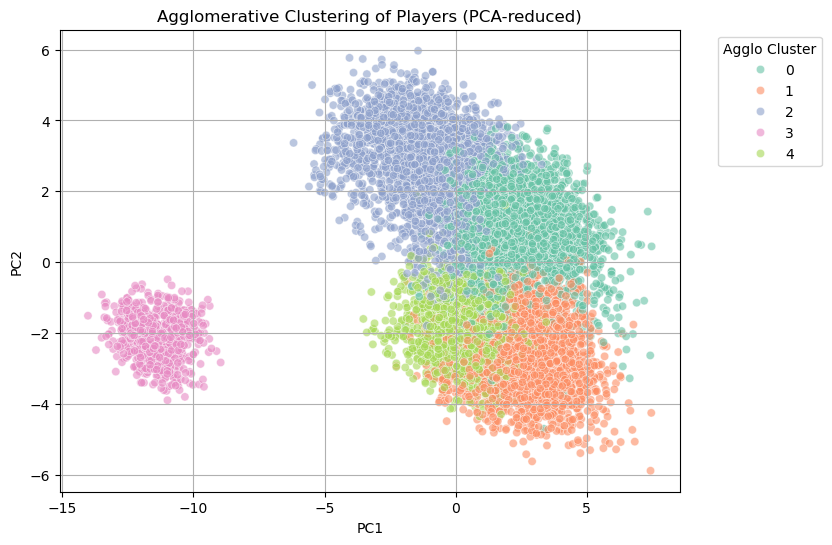

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
agglo_cluster,,,,,,,,,,,,,,,,,,,,,
0,69.739204,71.860999,64.712213,51.449055,60.273954,70.554993,52.945007,65.683198,61.540148,57.454453,...,64.250000,57.584683,62.739204,67.176113,64.836032,10.426788,10.434548,10.509784,10.493590,10.426788
1,71.197907,74.261146,65.981347,66.520018,55.709281,69.505005,64.226115,73.638763,67.589172,61.887170,...,67.603276,65.175614,30.205641,35.364877,31.935396,10.566424,10.611920,10.496815,10.479982,10.419927
2,65.838174,69.167107,47.483591,32.511882,63.688797,59.115805,33.644285,48.497548,40.384006,38.272350,...,45.704640,43.603169,65.167861,67.620521,65.155036,10.458318,10.307808,10.434176,10.473029,10.429272
3,68.080092,70.118993,16.040046,15.569794,16.170481,28.060641,16.267735,16.247140,16.447368,16.262014,...,33.537757,22.824943,15.645309,15.906178,16.042334,69.723112,66.135011,64.091533,67.661327,71.017162
4,64.961276,68.113895,49.992407,65.236143,63.972665,58.848899,59.438876,62.830676,52.287016,46.635535,...,55.448747,63.031131,24.353834,27.403948,24.683371,10.520881,10.529992,10.368261,10.468489,10.334852


In [56]:
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Hierarchical Clustering on the scaled player stats
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(scaled_stats)

# Add Agglomerative cluster labels to the dataframe
player_attr_df_latest['agglo_cluster'] = agglo_labels

# Plot Agglomerative clusters in PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=pca_result[:, 0],
    y=pca_result[:, 1],
    hue=agglo_labels,
    palette='Set2',
    alpha=0.6,
    legend='full'
)
plt.title("Agglomerative Clustering of Players (PCA-reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Agglo Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Show mean statistics for each Agglomerative cluster
agglo_cluster_characteristics = player_attr_df_latest.groupby('agglo_cluster')[num_stats].mean()
agglo_cluster_characteristics

/var/folders/vd/zd4pmd591n5962tqk3vrhj5c0000gn/T/ipykernel_71852/1662677842.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/vd/zd4pmd591n5962tqk3vrhj5c0000gn/T/ipykernel_71852/1662677842.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/vd/zd4pmd591n5962tqk3vrhj5c0000gn/T/ipykernel_71852/1662677842.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/vd/zd4pmd591n5962tqk3vrhj5c0000gn/T/ipykernel_71852/1662677842.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

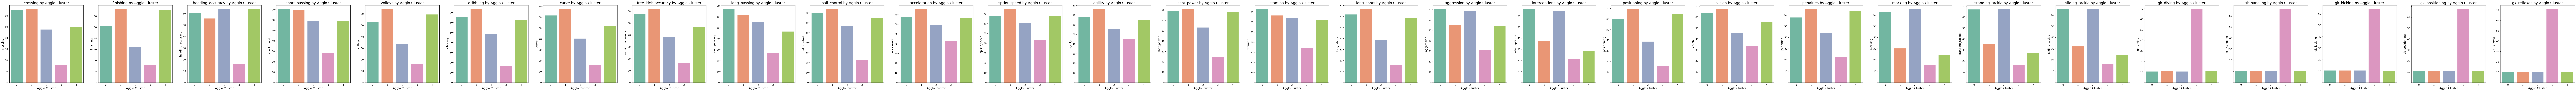

In [59]:
# Find stats where the largest cluster mean is at least 30 higher than the smallest
cluster_means = player_attr_df_latest.groupby('agglo_cluster')[num_stats].mean()
diffs = cluster_means.max() - cluster_means.min()
large_diff_stats = diffs[diffs >= 30].index.tolist()

# Plot bar charts for these stats
if large_diff_stats:
    n = len(large_diff_stats)
    fig, axes = plt.subplots(1, n, figsize=(8 * n, 7))  # Increased figure size
    if n == 1:
        axes = [axes]
    for i, stat in enumerate(large_diff_stats):
        sns.barplot(
            x=cluster_means.index,
            y=cluster_means[stat],
            ax=axes[i],
            palette='Set2'
        )
        axes[i].set_title(f"{stat} by Agglo Cluster", fontsize=18)
        axes[i].set_xlabel("Agglo Cluster", fontsize=14)
        axes[i].set_ylabel(stat, fontsize=14)
        axes[i].tick_params(axis='x', labelsize=12)
        axes[i].tick_params(axis='y', labelsize=12)
    
    plt.show()
else:
    print("No stats found where one or two clusters are larger than the others by 30.")

## 4 Next step?
